In [1]:
f=open('d:/data/text/trumph.txt') #파일 오픈
lines=f.readlines()[0]
print(len(lines))
f.close()
print(lines[:100])

8294
 Chief Justice Roberts, President Carter, President Clinton, President Bush, President Obama, fellow


In [9]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
tokenizer=RegexpTokenizer('[\w]+') #숫자+특수문자 제거 정규표현식
stop_words=stopwords.words('english') #영어 불용어 사전
words=lines.lower() #소문자로 변경
tokens=tokenizer.tokenize(words) #단어 단위로 나눔
#print(tokens)
#불용어 제거
stopped_tokens=[i for i in list(tokens) if i not in stop_words]
#2글자 이상인 단어들만 선택
stopped_tokens2=[i for i in stopped_tokens if len(i)>1]
print(stopped_tokens2)

['chief', 'justice', 'roberts', 'president', 'carter', 'president', 'clinton', 'president', 'bush', 'president', 'obama', 'fellow', 'americans', 'people', 'world', 'thank', 'citizens', 'america', 'joined', 'great', 'national', 'effort', 'rebuild', 'country', 'restore', 'promise', 'people', 'together', 'determine', 'course', 'america', 'world', 'many', 'many', 'years', 'come', 'face', 'challenges', 'confront', 'hardships', 'get', 'job', 'done', 'every', 'four', 'years', 'gather', 'steps', 'carry', 'orderly', 'peaceful', 'transfer', 'power', 'grateful', 'president', 'obama', 'first', 'lady', 'michelle', 'obama', 'gracious', 'aid', 'throughout', 'transition', 'magnificent', 'thank', 'today', 'ceremony', 'however', 'special', 'meaning', 'today', 'merely', 'transferring', 'power', 'one', 'administration', 'another', 'one', 'party', 'another', 'transferring', 'power', 'washington', 'dc', 'giving', 'back', 'people', 'long', 'reaped', 'rewards', 'government', 'people', 'borne', 'cost', 'washin

In [10]:
import pandas as pd
#빈도순으로 내림차순 정렬
pd.Series(stopped_tokens2).value_counts()#.head(10)

america       20
american      11
people        10
country        9
one            8
              ..
birth          1
conviction     1
speak          1
class          1
unity          1
Length: 455, dtype: int64

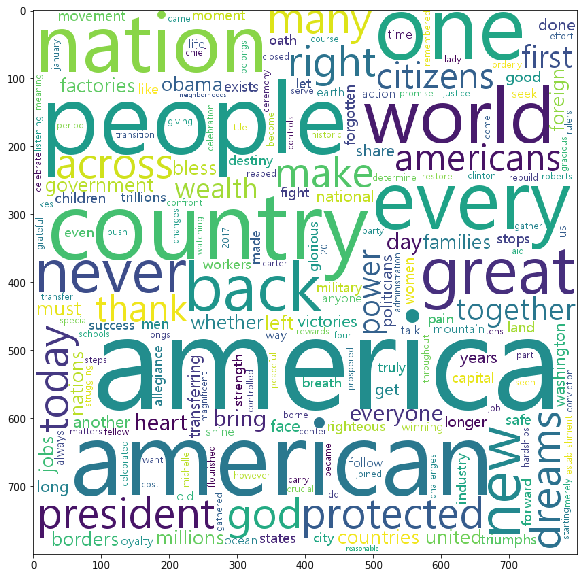

In [15]:
#워드클라우드
%matplotlib inline
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
#워드클라우드 함수
wordcloud = WordCloud(
font_path='c:/windows/fonts/malgun.ttf',
width=800,
height=800,
background_color='white')

count = Counter(stopped_tokens2) #단어들의 출현횟수
#print(count)
#워드클라우드 생성
wordcloud = wordcloud.generate_from_frequencies(count)

# def to_array(self):
#     return np.array(self.to_image())

# array = wordcloud.to_array()
fig=plt.figure(figsize=(10,10))
plt.imshow(array)
plt.show()

In [57]:
#한글 뉴스 분석
f=open('d:/data/text/news.txt',encoding='utf-8')
lines=f.readlines()
f.close()
print(lines[:100])

['\'팬과 관중석서 갈등\' 다이어, 무리뉴는 "상황은 충분히 이해"\n', '기사입력 2020.03.05. 오전 09:57 최종수정 2020.03.05. 오전 10:02 기사원문\n', '좋아요 좋아요 평가하기공감댓글수4\n', '글꼴 본문 텍스트 한단계 확대 본문 텍스트 한단계 축소 본문 프린트\n', '\n', '관중석까지 올라간 다이어\n', '\n', '\n', '[STN스포츠=이형주 기자]\n', '\n', '주제 무리뉴 감독이 에릭 다이어를 감쌌다.\n', '\n', '토트넘 핫스퍼는 5일(한국시간) 영국 그레이터런던지역 그레이터런던의 헤링게이에 위치한 토트넘 핫스퍼 스타디움에서 열린 2019/20시즌 잉글랜드 FA컵 5라운드(16강) 노리치 시티와의 경기에서 1-1로 비겼다. 하지만 승부차기 끝에 패배하며 대회를 마무리했다.\n', '\n', '이날 토트넘은 얀 베르통언의 헤더골로 기세를 탔지만 이를 지키지 못했다. 승부차기까지 간 승부에서 결국 노리치에 8강행 티켓을 내줬다. 대회 탈락도 뼈아픈데다 최근 4전 전패라는 최악의 부진에 빠지게 됐다.\n', '\n', '설상가상으로 팀의 다이어가 팬과 마찰을 빚는 일까지 생겼다. 이날 선발 출장한 다이어는 준수한 활약에 페널티킥까지 성공했다. 하지만 동생이 있는 자리에서 팬과 마찰을 빚었고 관중석까지 올라가는 상황이 벌어졌다. 다행히 안전 요원들과 주변 팬들의 제지로 더 큰 상황이 펼쳐지지는 않았다.\n', '\n', '같은 날 영국 언론 <풋볼 런던>에 따르면 무리뉴 감독은 "다이어는 프로로서 해서는 안 될 행동을 했다"라고 밝히면서도 "하지만 충분히 이해는 간다. 누군가 당신의 가족을 모욕한다면 누구라도 그렇게 반응할 수 있었을 것이다"라고 덧붙였다. \n']


In [66]:
rows=[]
for line in lines:
    rows.append(line.replace('\n','')) #줄바꿈 문자 제거
    
rows

['\'팬과 관중석서 갈등\' 다이어, 무리뉴는 "상황은 충분히 이해"',
 '기사입력 2020.03.05. 오전 09:57 최종수정 2020.03.05. 오전 10:02 기사원문',
 '좋아요 좋아요 평가하기공감댓글수4',
 '글꼴 본문 텍스트 한단계 확대 본문 텍스트 한단계 축소 본문 프린트',
 '',
 '관중석까지 올라간 다이어',
 '',
 '',
 '[STN스포츠=이형주 기자]',
 '',
 '주제 무리뉴 감독이 에릭 다이어를 감쌌다.',
 '',
 '토트넘 핫스퍼는 5일(한국시간) 영국 그레이터런던지역 그레이터런던의 헤링게이에 위치한 토트넘 핫스퍼 스타디움에서 열린 2019/20시즌 잉글랜드 FA컵 5라운드(16강) 노리치 시티와의 경기에서 1-1로 비겼다. 하지만 승부차기 끝에 패배하며 대회를 마무리했다.',
 '',
 '이날 토트넘은 얀 베르통언의 헤더골로 기세를 탔지만 이를 지키지 못했다. 승부차기까지 간 승부에서 결국 노리치에 8강행 티켓을 내줬다. 대회 탈락도 뼈아픈데다 최근 4전 전패라는 최악의 부진에 빠지게 됐다.',
 '',
 '설상가상으로 팀의 다이어가 팬과 마찰을 빚는 일까지 생겼다. 이날 선발 출장한 다이어는 준수한 활약에 페널티킥까지 성공했다. 하지만 동생이 있는 자리에서 팬과 마찰을 빚었고 관중석까지 올라가는 상황이 벌어졌다. 다행히 안전 요원들과 주변 팬들의 제지로 더 큰 상황이 펼쳐지지는 않았다.',
 '',
 '같은 날 영국 언론 <풋볼 런던>에 따르면 무리뉴 감독은 "다이어는 프로로서 해서는 안 될 행동을 했다"라고 밝히면서도 "하지만 충분히 이해는 간다. 누군가 당신의 가족을 모욕한다면 누구라도 그렇게 반응할 수 있었을 것이다"라고 덧붙였다. ']

In [34]:
len(lines)

19

In [36]:
#한나눔 형태소 분석기
from konlpy.tag import Hannanum
han=Hannanum()

In [38]:
a='아버지가 방에 들어가신다'
han.nouns(a) #명사만 추출

['아버지', '방']

In [37]:
temp=[]
for i in range(len(lines)):
    temp.append(han.nouns(lines[i])) #명사만 추출하여 저장
    
print(temp)

[['팬', '관중석', '등', '다이', '무리뉴', '상황', '이해'], ['기사입력', '2020.', '03.', '05', '오전', '09', '57', '최종수정', '2020.', '03.', '05', '오전', '10', '02', '기사원문'], ['평가하기공감댓글수4'], ['글꼴', '본문', '텍스트', '한단계', '확대', '본문', '텍스트', '한단계', '축소', '본문', '프린트'], [], ['관중석', '다이어'], [], [], ['[STN스포츠=이형주', '기자'], [], ['주제', '무리뉴', '감독', '에릭', '다이어'], [], ['토트넘', '핫스퍼', '5일(한국시간)', '영국', '그레이터런던지역', '그레이터런던', '헤링게이', '위치한', '토트넘', '핫스퍼', '스타디움', '잉글랜드', '컵', '5라운드(16강)', '노리치', '시티', '경기', '1-1', '승부차기', '끝', '패배', '대회', '마무리'], [], ['이날', '토트넘', '얀', '베르통언', '헤더골', '기세', '이', '승부차기', '승부', '노리치', '8강행', '티켓', '탈락', '데', '4전', '전패', '최악', '부진'], [], ['설상가상', '팀', '다이어', '팬', '마찰', '일', '이날', '선발', '출장', '다이어', '준수', '활약', '페널티킥', '성공', '동생', '자리', '팬', '마찰', '관중석', '상황', '전', '요원들', '주변', '들', '제지', '상황'], [], ['영국', '언론', '<풋볼', '런던>', '무리뉴', '감독', '다이어', '프로', '행동', '이해', '누군가', '당신', '가족', '모욕', '누구', '반응', '수', '것']]


In [28]:
#2차원 리스트를 1차원 리스트로 변환하는 함수
def flatten(items):
    flatList=[]
    for elem in items:
        if type(elem) == list: #자료형이 리스트이면
            for e in elem:
                flatList.append(e)
        else:
            flatList.append(elem)
    return flatList

word_list=flatten(temp)
#글자수가 2글자 이상인 단어들만 선택
word_list=pd.Series([x for x in word_list if len(x)>1])
print(word_list)

0      관중석
1       다이
2      무리뉴
3       상황
4       이해
      ... 
108     당신
109     가족
110     모욕
111     누구
112     반응
Length: 113, dtype: object


In [74]:
#불용어 처리
stopwords=['이날','03.','본문','오전','2020.','05','텍스트',
          '5일(한국시간)','기사입력','09','10','10','02','기사원문',
          '평가하기공감댓글수4','최종수정','[STN스포츠=이형주','57']
word_list2=[i for i in word_list if i not in stopwords]
word_list2

['관중석',
 '다이',
 '무리뉴',
 '상황',
 '이해',
 '글꼴',
 '한단계',
 '확대',
 '한단계',
 '축소',
 '프린트',
 '관중석',
 '다이어',
 '기자',
 '주제',
 '무리뉴',
 '감독',
 '에릭',
 '다이어',
 '토트넘',
 '핫스퍼',
 '영국',
 '그레이터런던지역',
 '그레이터런던',
 '헤링게이',
 '위치한',
 '토트넘',
 '핫스퍼',
 '스타디움',
 '잉글랜드',
 '5라운드(16강)',
 '노리치',
 '시티',
 '경기',
 '1-1',
 '승부차기',
 '패배',
 '대회',
 '마무리',
 '토트넘',
 '베르통언',
 '헤더골',
 '기세',
 '승부차기',
 '승부',
 '노리치',
 '8강행',
 '티켓',
 '탈락',
 '4전',
 '전패',
 '최악',
 '부진',
 '설상가상',
 '다이어',
 '마찰',
 '선발',
 '출장',
 '다이어',
 '준수',
 '활약',
 '페널티킥',
 '성공',
 '동생',
 '자리',
 '마찰',
 '관중석',
 '상황',
 '요원들',
 '주변',
 '제지',
 '상황',
 '영국',
 '언론',
 '<풋볼',
 '런던>',
 '무리뉴',
 '감독',
 '다이어',
 '프로',
 '행동',
 '이해',
 '누군가',
 '당신',
 '가족',
 '모욕',
 '누구',
 '반응']

In [78]:
#단어 출현 빈도(내림차순)
word_list.value_counts().head(30)

다이어         5
본문          3
상황          3
무리뉴         3
토트넘         3
관중석         3
노리치         2
이날          2
03.         2
한단계         2
오전          2
2020.       2
핫스퍼         2
영국          2
승부차기        2
05          2
마찰          2
텍스트         2
감독          2
이해          2
마무리         1
누군가         1
프린트         1
최악          1
주제          1
기사원문        1
부진          1
5일(한국시간)    1
준수          1
성공          1
dtype: int64

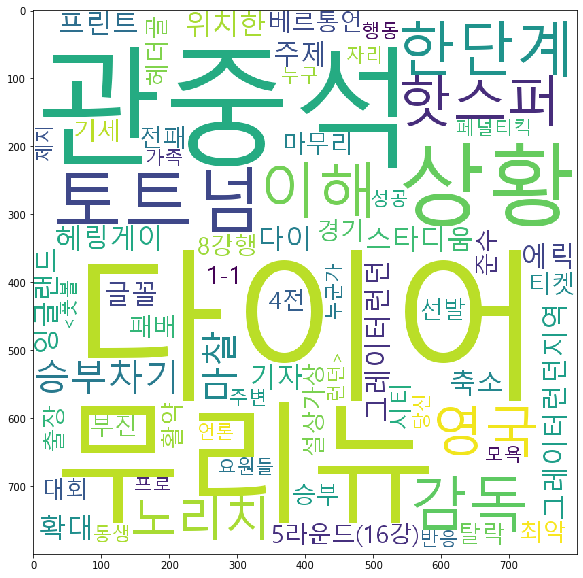

In [76]:
#워드클라우드
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter

wordcloud=WordCloud(
font_path='c:/window/fonts/malgun.ttf',
width=800, height=800, background_color='white')


count=Counter(word_list2)#단어별 출현빈도 계산
#워드클라우드 생성
wordcloud=wordcloud.generate_from_frequencies(count)
fig=plt.figure(figsize=(10,10))
plt.imshow(wordcloud) #워드클라우드 이미지 출력
plt.show()